In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#[1]scikit-learn, “scikit-learn: machine learning in Python,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/

#Loading the data
data = pd.read_csv('./faces/faces_AU.csv')

#printing out all columns in faces_AU.csv
print(data.columns)


Index(['Unnamed: 0', 'face', ' confidence', ' gaze_0_x', ' gaze_0_y',
       ' gaze_0_z', ' gaze_1_x', ' gaze_1_y', ' gaze_1_z', ' gaze_angle_x',
       ...
       ' AU14_c', ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c',
       ' AU26_c', ' AU28_c', ' AU45_c', 'img'],
      dtype='object', length=713)


In [2]:
##PART 1
# Adapted from https://sites.pitt.edu/~jeffcohn/FACSmodule.html

#features = [' gaze_0_x', ' gaze_0_y', ' gaze_0_z', ' gaze_1_x', ' gaze_1_y',' gaze_1_z',' eye_lmk_x_0', ' eye_lmk_x_1']
#features = [' AU01_r',' AU02_r',' AU04_r',' AU06_r',' AU07_r', ' AU12_r', ' AU15_r', ' AU20_r',' AU25_r',' AU26_r']
#features = [' AU01_r',' AU02_r',' AU25_r',' AU26_r',' AU01_c',' AU14_c', ' AU12_c',' AU20_c']
#features = [' AU01_r',' AU02_r',' AU25_r',' AU26_r']

features = [' AU07_r',' AU26_r',' AU20_r',' AU12_r']
#AU7 - Lid Tightener: Associated with fear.
#AU12 - Lip Corner Puller: Associated with happiness.
#AU20 - Lip stretcher: Associated with happiness.
#AU26 - Jaw Drop: Associated with surprise and fear.

X = data[features].values

X

array([[0.  , 0.  , 0.29, 0.  ],
       [0.  , 1.02, 0.  , 0.  ],
       [2.9 , 0.37, 2.19, 1.71],
       ...,
       [0.  , 0.37, 0.  , 1.15],
       [0.  , 0.49, 0.  , 0.  ],
       [1.39, 0.89, 0.  , 2.82]])

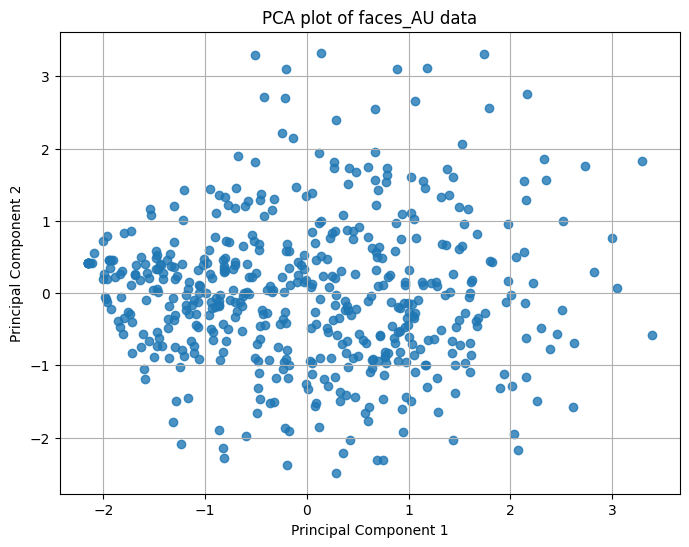

Explained variance ratio for each component: [0.35817522 0.25554316]


In [3]:
#Standardize the features
#https://www.datacamp.com/tutorial/principal-component-analysis-in-python
#VanderplasJacob_2016_InDepthPrincipalCompo_PythonDataScienceHand.pdf
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_scaled)

#plot of chosen feature data
plt.figure(figsize=(8, 6))
plt.scatter(principal_comp[:, 0], principal_comp[:, 1], alpha=0.8)
plt.title('PCA plot of faces_AU data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#explained variance for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance_ratio)

#principal component 1 holds 35.8% of the information while the principal component 2 holds 25.5% of the information.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


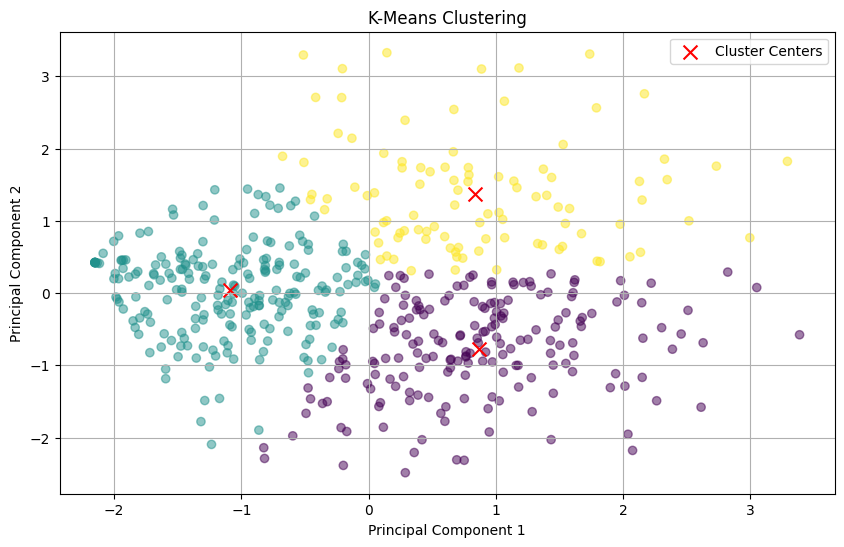

In [4]:
##PART 2

from sklearn.cluster import KMeans

# Adapted from VanderplasJacob_2016_InDepthKMeansClusteri_PythonDataScienceHand.pdf
#K-Means clustering using sklearn
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(principal_comp)

#luster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

#potting the clustered data points
plt.figure(figsize=(10, 6))
plt.scatter(principal_comp[:, 0], principal_comp[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

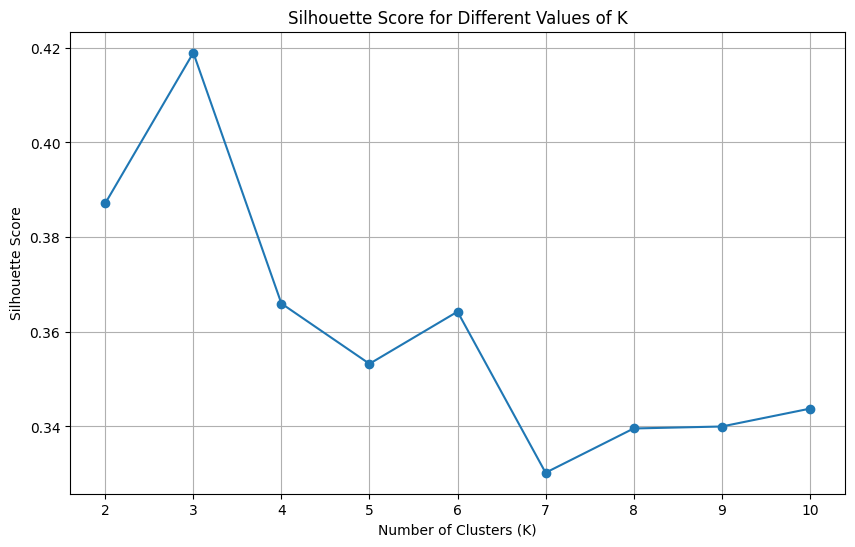

Optimal Silhouette Score: 0.41896800990023186
Optimal K value: 3


In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#lists to store silhouette scores
silhouette_scores = []

#range of K values
k_values = range(2, 11)

#ssilhouette score for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(principal_comp)
    silhouette_avg = silhouette_score(principal_comp, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

##optimal silhouette score and corresponding K value
optimal_score = max(silhouette_scores)
optimal_k = k_values[silhouette_scores.index(optimal_score)]

print("Optimal Silhouette Score:", optimal_score)
print("Optimal K value:", optimal_k)

#This signifies that the optimal number of clusters for this dataset is 3, as it yields the highest silhouette score. This suggests that the data can be effectively partitioned into 3 distinct groups based on their characteristics.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


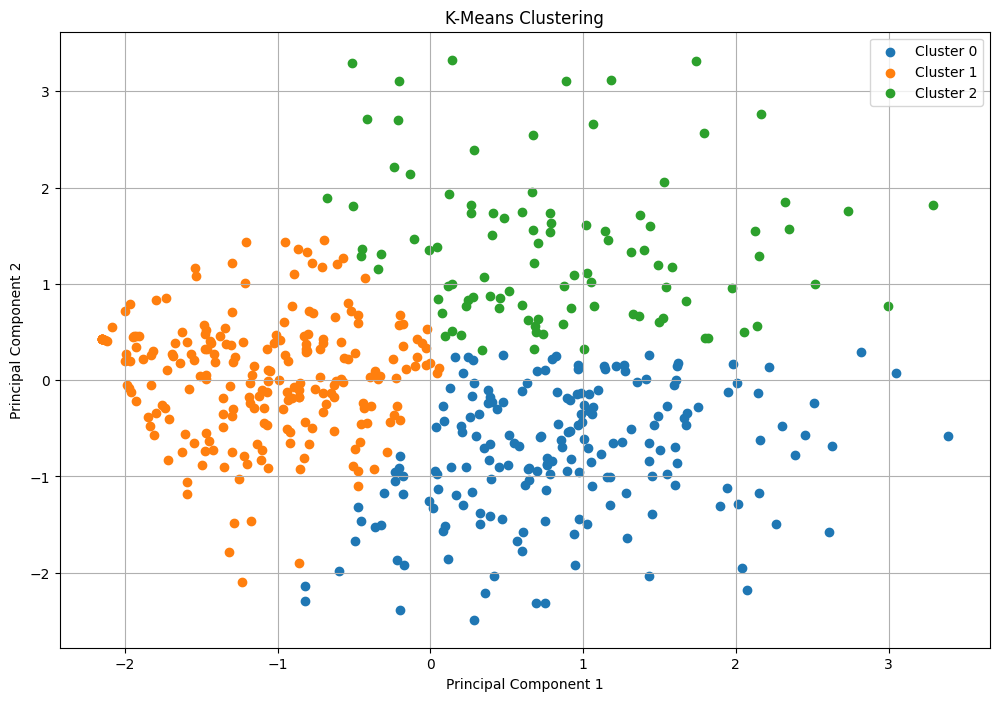

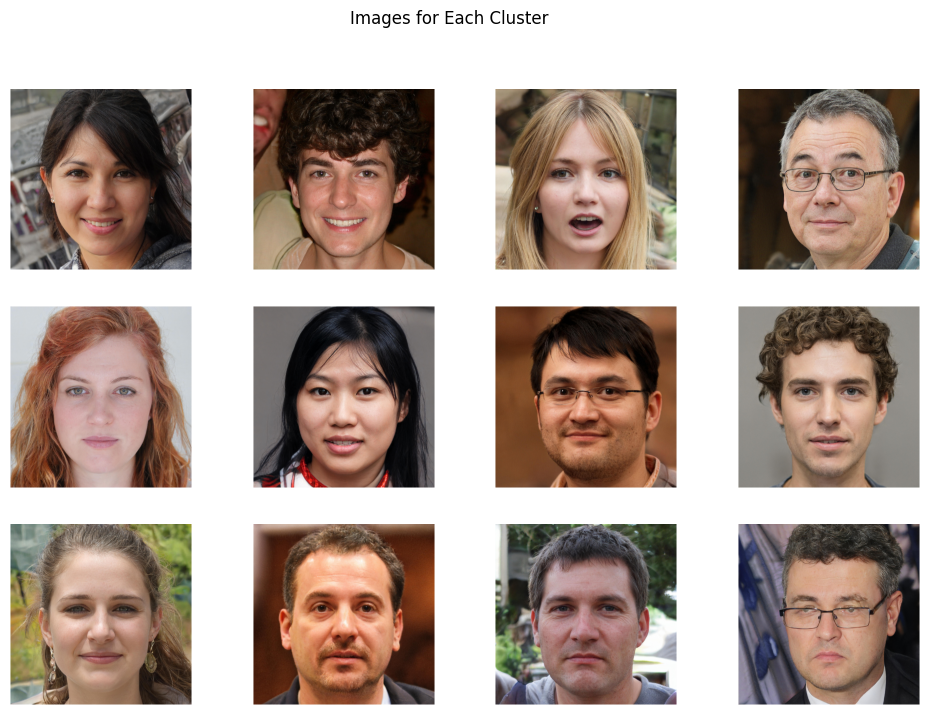

In [12]:
##PART 3
#https://stackoverflow.com/questions/66204637/visualizing-clusters-result-using-pca-python
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans

image_folder = "./faces"
image_filenames = sorted(os.listdir(image_folder))

#Load the cluster labels obtained from K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(principal_comp)

#dictionary to store image filenames corresponding to each cluster
cluster_images = {i: [] for i in range(optimal_k)}
for i, filename in enumerate(image_filenames):
    cluster_images[cluster_labels[i]].append(os.path.join(image_folder, filename))

#Function to display images for each cluster
def plot_images(images, ax, zoom=0.2):
    for i, image_path in enumerate(images[:4]):
        img = plt.imread(image_path)
        ax[i].imshow(img)
        ax[i].axis('off')

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster_id in range(optimal_k):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_points = principal_comp[cluster_indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Display images for each cluster
fig, axs = plt.subplots(optimal_k, 4, figsize=(12, 8))
for i in range(optimal_k):
    cluster_images_sample = np.random.choice(cluster_images[i], size=4, replace=False)
    plot_images(cluster_images_sample, axs[i])

plt.suptitle('Images for Each Cluster')
plt.show()

#by visually inspecting,
#Cluster 0 - Happy faces
#Cluster 1 - Neutral expression
#Cluster 2 - Sad
#Limitation, the images close to the centre of the clusters may overlap

In [13]:
'''
    distances = np.linalg.norm(X_pca[cluster_labels == i] - kmeans.cluster_centers_[i], axis=1)
    # Sort the indices based on distances in descending order
    furthest_indices = np.argsort(distances)[::-1][:4]
    furthest_images = [cluster_images[i][index] for index in furthest_indices]
    plot_images(furthest_images, axs[i])

plt.suptitle('Furthest Images from Cluster Center')
plt.show()



SyntaxError: incomplete input (<ipython-input-13-18697d5b2b2b>, line 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
	- /content/drive/MyDrive/Colab Notebooks/faces/000006.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000017.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000019.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000020.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000031.jpg
Cluster 2:
	- /content/drive/MyDrive/Colab Notebooks/faces/000007.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000033.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000053.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000055.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000056.jpg
Cluster 3:
	- /content/drive/MyDrive/Colab Notebooks/faces/000003.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000005.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000011.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000013.jpg
	- /content/drive/MyDrive/Colab Notebooks/faces/000014.jpg

Proposed cluster labels:
- Cluster 1: Happy faces
- Cluster 2: Neutral faces
- Cl

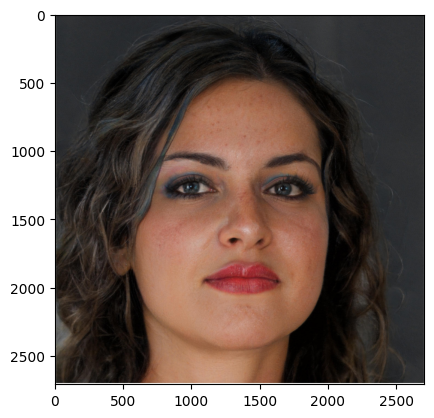

In [64]:
'''import os

#nmumber of images to print for each cluster
num_images_per_cluster = 5

#Loading the image filenames
image_folder = "/content/drive/MyDrive/Colab Notebooks/faces"
image_filenames = sorted(os.listdir(image_folder))

#loadng the cluster labels obtained from K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

#dictionary to store image filenames corresponding to each cluster
cluster_images = {i: [] for i in range(optimal_k)}
for i, filename in enumerate(image_filenames):
    cluster_images[cluster_labels[i]].append(os.path.join(image_folder, filename))

#first 5 images in each cluster
for cluster_id in range(optimal_k):
    print(f"Cluster {cluster_id + 1}:")
    for image_path in cluster_images[cluster_id][:num_images_per_cluster]:
        print(f"\t- {image_path}")
        plt.imshow(img)

#labels
print("\nProposed cluster labels:")
print(f"- Cluster 1: Happy faces")
print(f"- Cluster 2: Neutral faces")
print(f"- Cluster 3: Angry faces")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=0ee47398c2cfe60cca685716bb8137a97291f1f2a9d981b1587b5ddc4cb74698
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


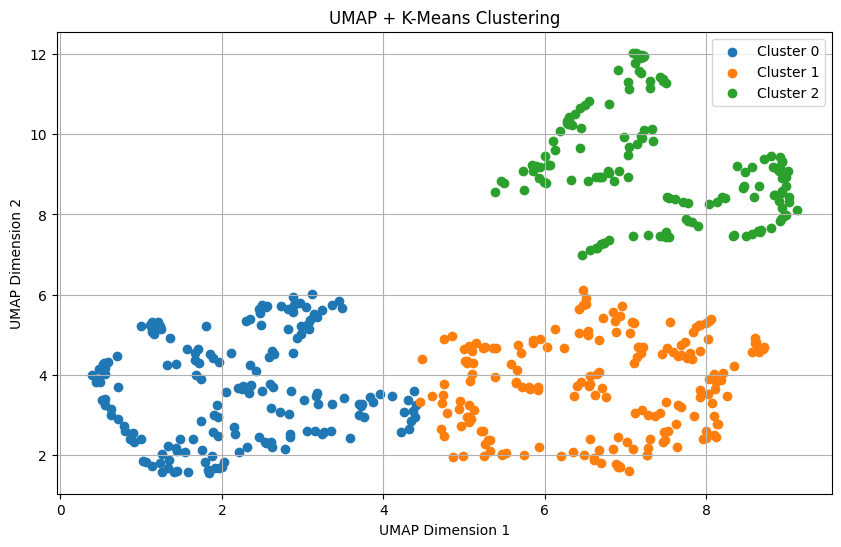

In [14]:
!pip install umap-learn
import umap
import umap.umap_ as umap

#reduction with UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_ = umap_model.fit_transform(X)

#K-Means clustering on the UMAP-reduced data
kmeans_umap = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_umap.fit(umap_)
umap_cluster_labels = kmeans_umap.labels_

#pplot
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    cluster_indice = np.where(umap_cluster_labels == cluster_id)[0]
    cluster_pt = umap_[cluster_indice]
    plt.scatter(cluster_points[:, 0], cluster_pt[:, 1], label=f'Cluster {cluster_id}')

plt.title('UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

#UMAP shows 3 clusters